In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os
import matplotlib.mlab as mlab
from scipy.signal import iirnotch, lfilter, freqz, butter, welch
from prettytable import PrettyTable

folder_path =[]
d = []
type = ["Normal", "Aggressive"]
mode = 0
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))
name = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep","Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
move = d[0]


DFT of a single Move

In [ ]:
fig, axes = plt.subplots(8,4, figsize=(10,10))
signal_mean = np.zeros(shape=(8,4))
skib = np.zeros(shape=(1,8))
type = ["Normal","Aggressive"]
mode = 0
for i in range(1,5):
    file = move
    folder_path = fr"data\sub{i}\{type[mode]}\txt"
    df = pd.read_csv(folder_path + "\\" + file, sep = "\t", header = None, names=name)

    Fs = 1000
    T = 1/Fs
    L = len(df)
    t = np.arange(0, len(df))*T
    f = Fs*np.arange(0,L/2)/L

    b_notch,a_notch = iirnotch(50,30,Fs)
    b_band, a_band = butter(4,[30/(Fs/2),300/(Fs/2)], 'band')

    f_notch, h_notch = freqz(b_notch,a_notch)
    f_band, h_band = freqz(b_band,a_band)

    b_comb = np.convolve(b_notch,b_band)
    a_comb = np.convolve(a_notch,a_band)

    f_comv, h_comb = freqz(b_comb,a_comb)
    c = 0
    tmp = []
    for j in name:
        Y = np.fft.fft(y)
        P2 = abs(Y/L)
        P1 = P2[0:L//2+1]
        signal_mean[c][i-1] = np.mean(np.abs(P1))
        tmp.append(np.mean(np.abs(P1)))
        if len(P1) != len(f):
            P1 = P1[:-1]
        P1[1:-1] = 2*P1[1:-1]
        axes[c, i-1].plot(f,P1,linewidth=0.5)
        axes[c, i-1].grid("minor")
        if i == 1:
            axes[c, i-1].set_ylabel(j)
        else:
            axes[c, i-1].set_ylabel("Magnitude [dB]")
        if c == 0:
            axes[c, i-1].set_title(f"sub{i}")
        axes[c, i-1].set_xlabel("Frequency [Hz]")
        axes[c, i-1].set_yscale('log')
        c += 1
    skib = np.vstack((skib,tmp))
fig.suptitle(f"Frequency Spectrum of {type[mode]} {file.rsplit('.')[0]}", y=1)
plt.tight_layout(pad=0.5)
plt.show()

    


Mean Plots

In [ ]:
window = 200

folder_path =[]
d = []
type = ["Normal", "Aggressive"]
mode = 1
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))

c = 0

for move in d:
    means = np.zeros(shape=(8, 4))
    stds = np.zeros(shape=(8, 4))
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 2, figsize=(50,50/2), constrained_layout=True)
        c = 0
    # subject loop inside the move loop
    for i in range(1, 2):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                tmp_mav.append(np.mean(np.abs(y[k:k+window])))
                tmp_std.append(np.std((y[k:k+window])))
            stds[count][i-1] = np.mean(tmp_std)
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
            # Plot improvements
            axes_PSD[c, i - 1].plot(tmp_mav, linewidth=2, label=j)
            axes_PSD[c, i - 1].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c, i - 1].set_xlabel("Window number", fontsize=28)
            axes_PSD[c, i - 1].set_ylabel("Mean Absolut Value", fontsize=28)
            axes_PSD[c, i - 1].tick_params(axis="both", labelsize=20)

            # Titles & Legends
            if c == 0:
                axes_PSD[c, i - 1].set_title(f"Subject {i}", fontsize=50, fontweight="bold")
            if i == 1:
                axes_PSD[c, i - 1].set_ylabel(move.rsplit(".txt")[0], fontsize=50, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c, i - 1].legend(fontsize=20, frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))
    c += 1
    # Bigger title for the full figure
    fig_PSD.suptitle(f"Mean Absolute Value of {type[mode]} Activity",fontsize=50, fontweight="bold", y=1.04)
    # Improve layout for better spacing
plt.tight_layout(pad=1)
plt.show()


STD Plots

C:\Users\ophir\AppData\Local\Temp\ipykernel_8264\1354805809.py:68: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=1)


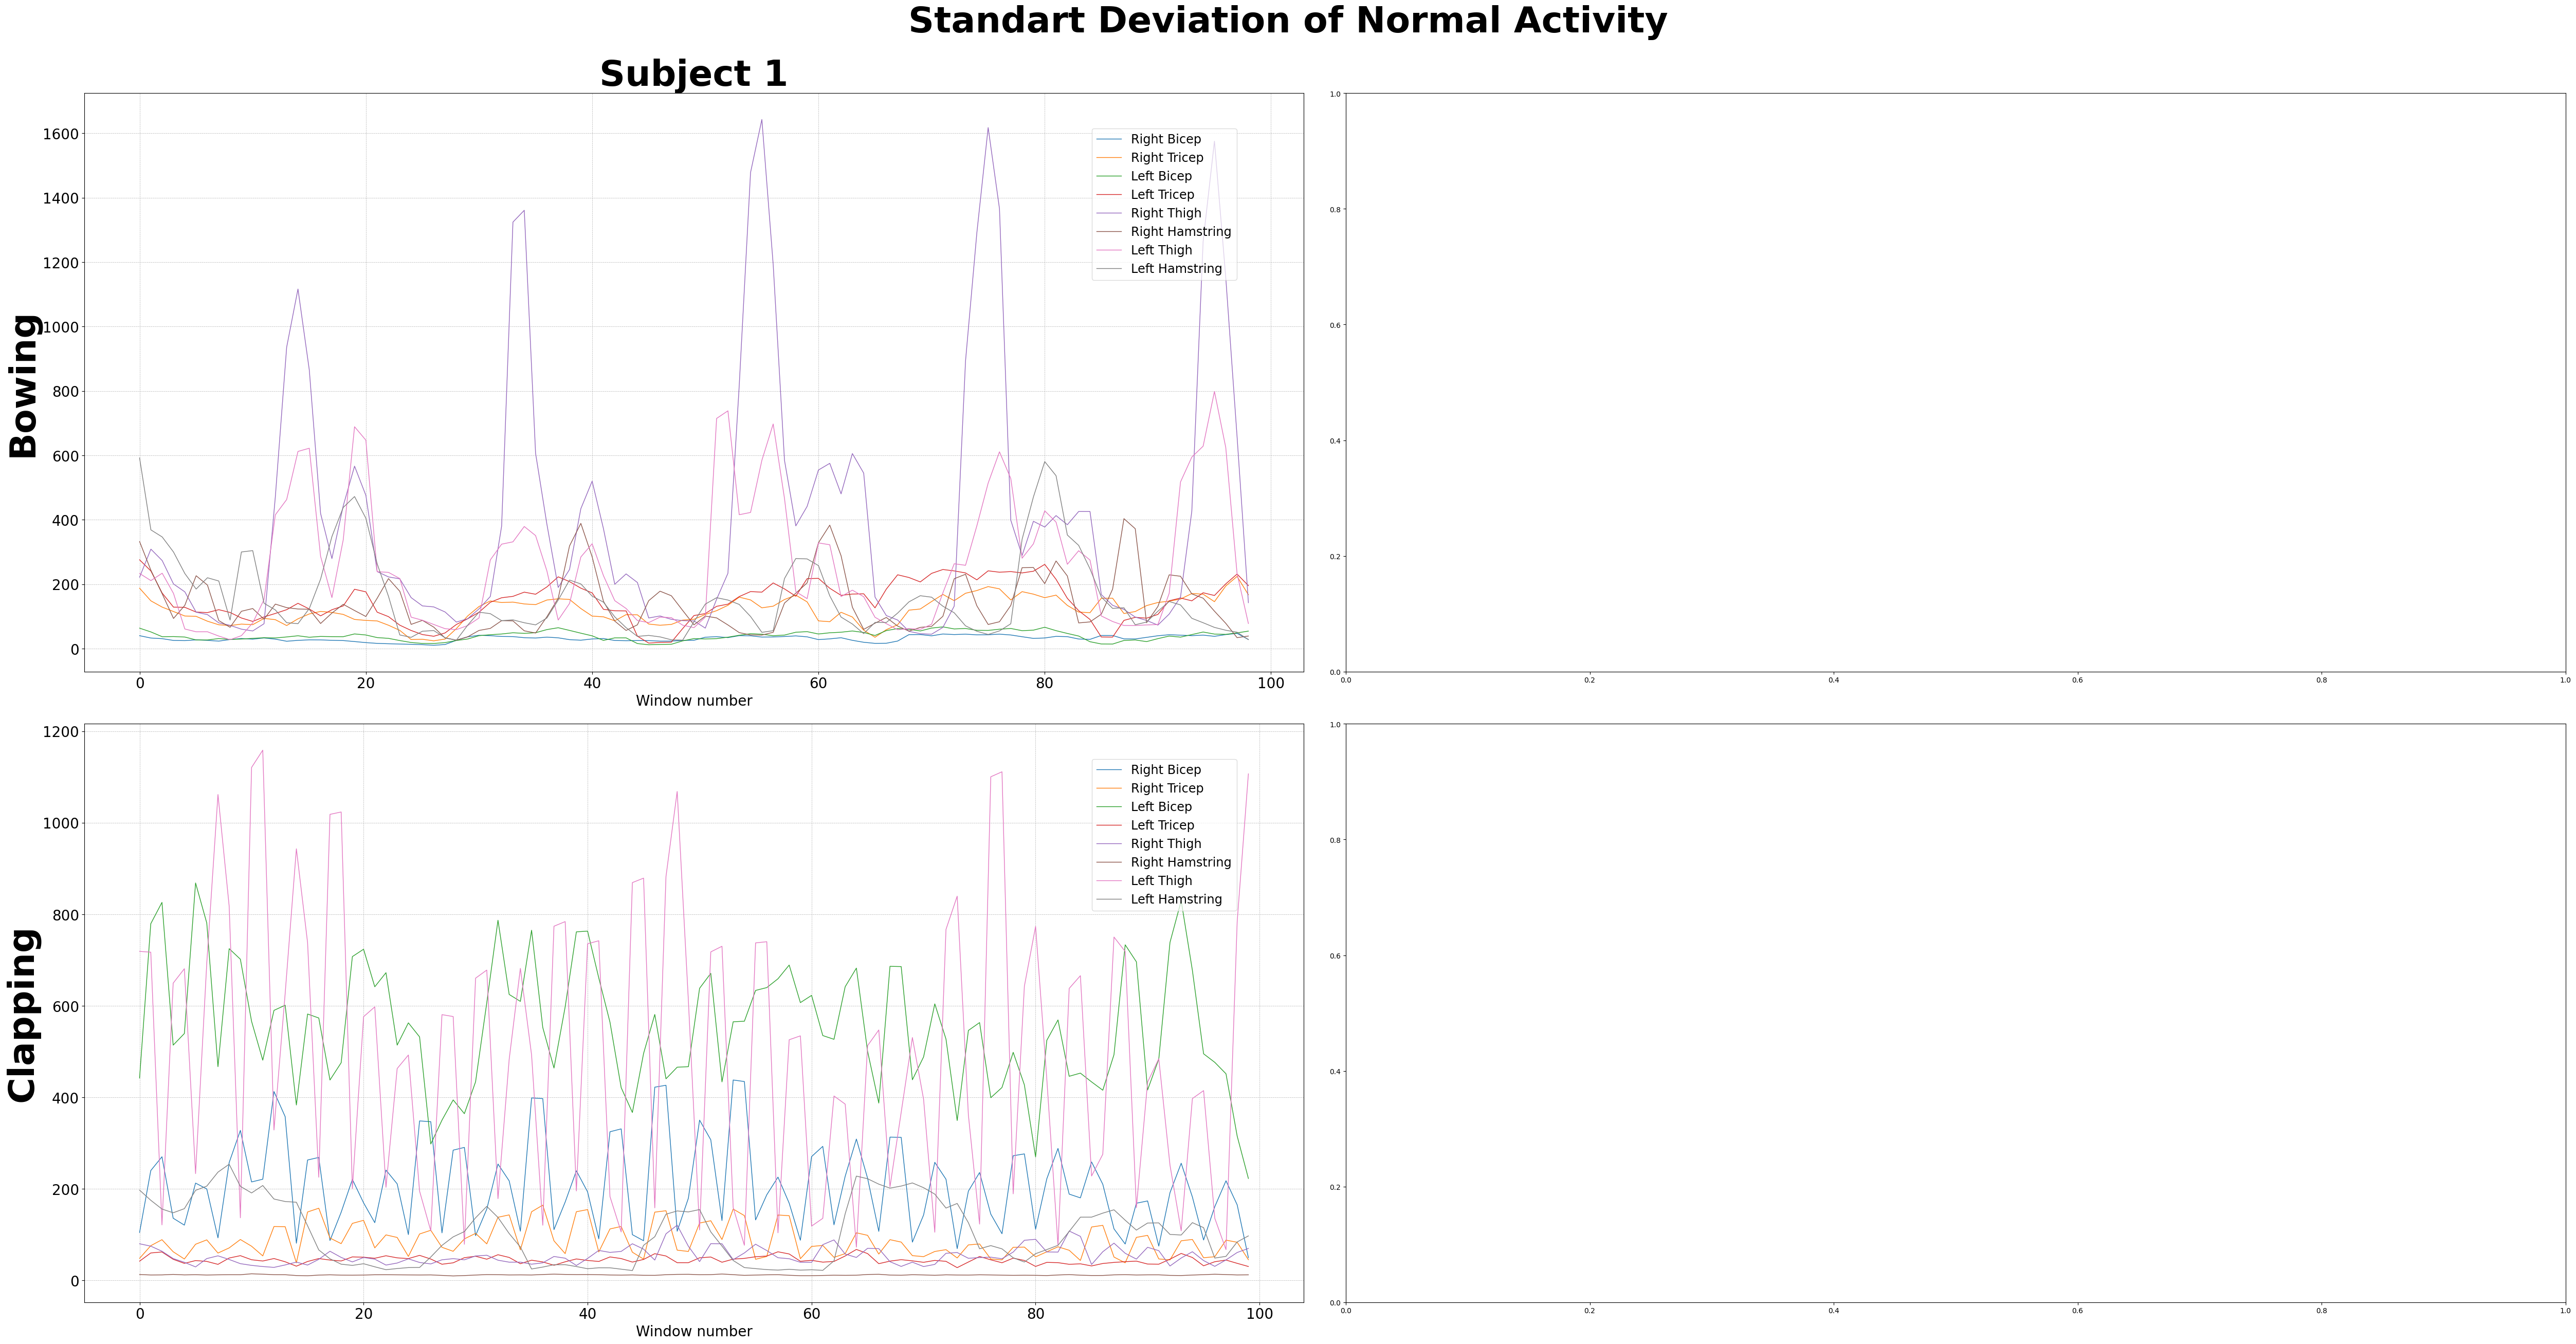

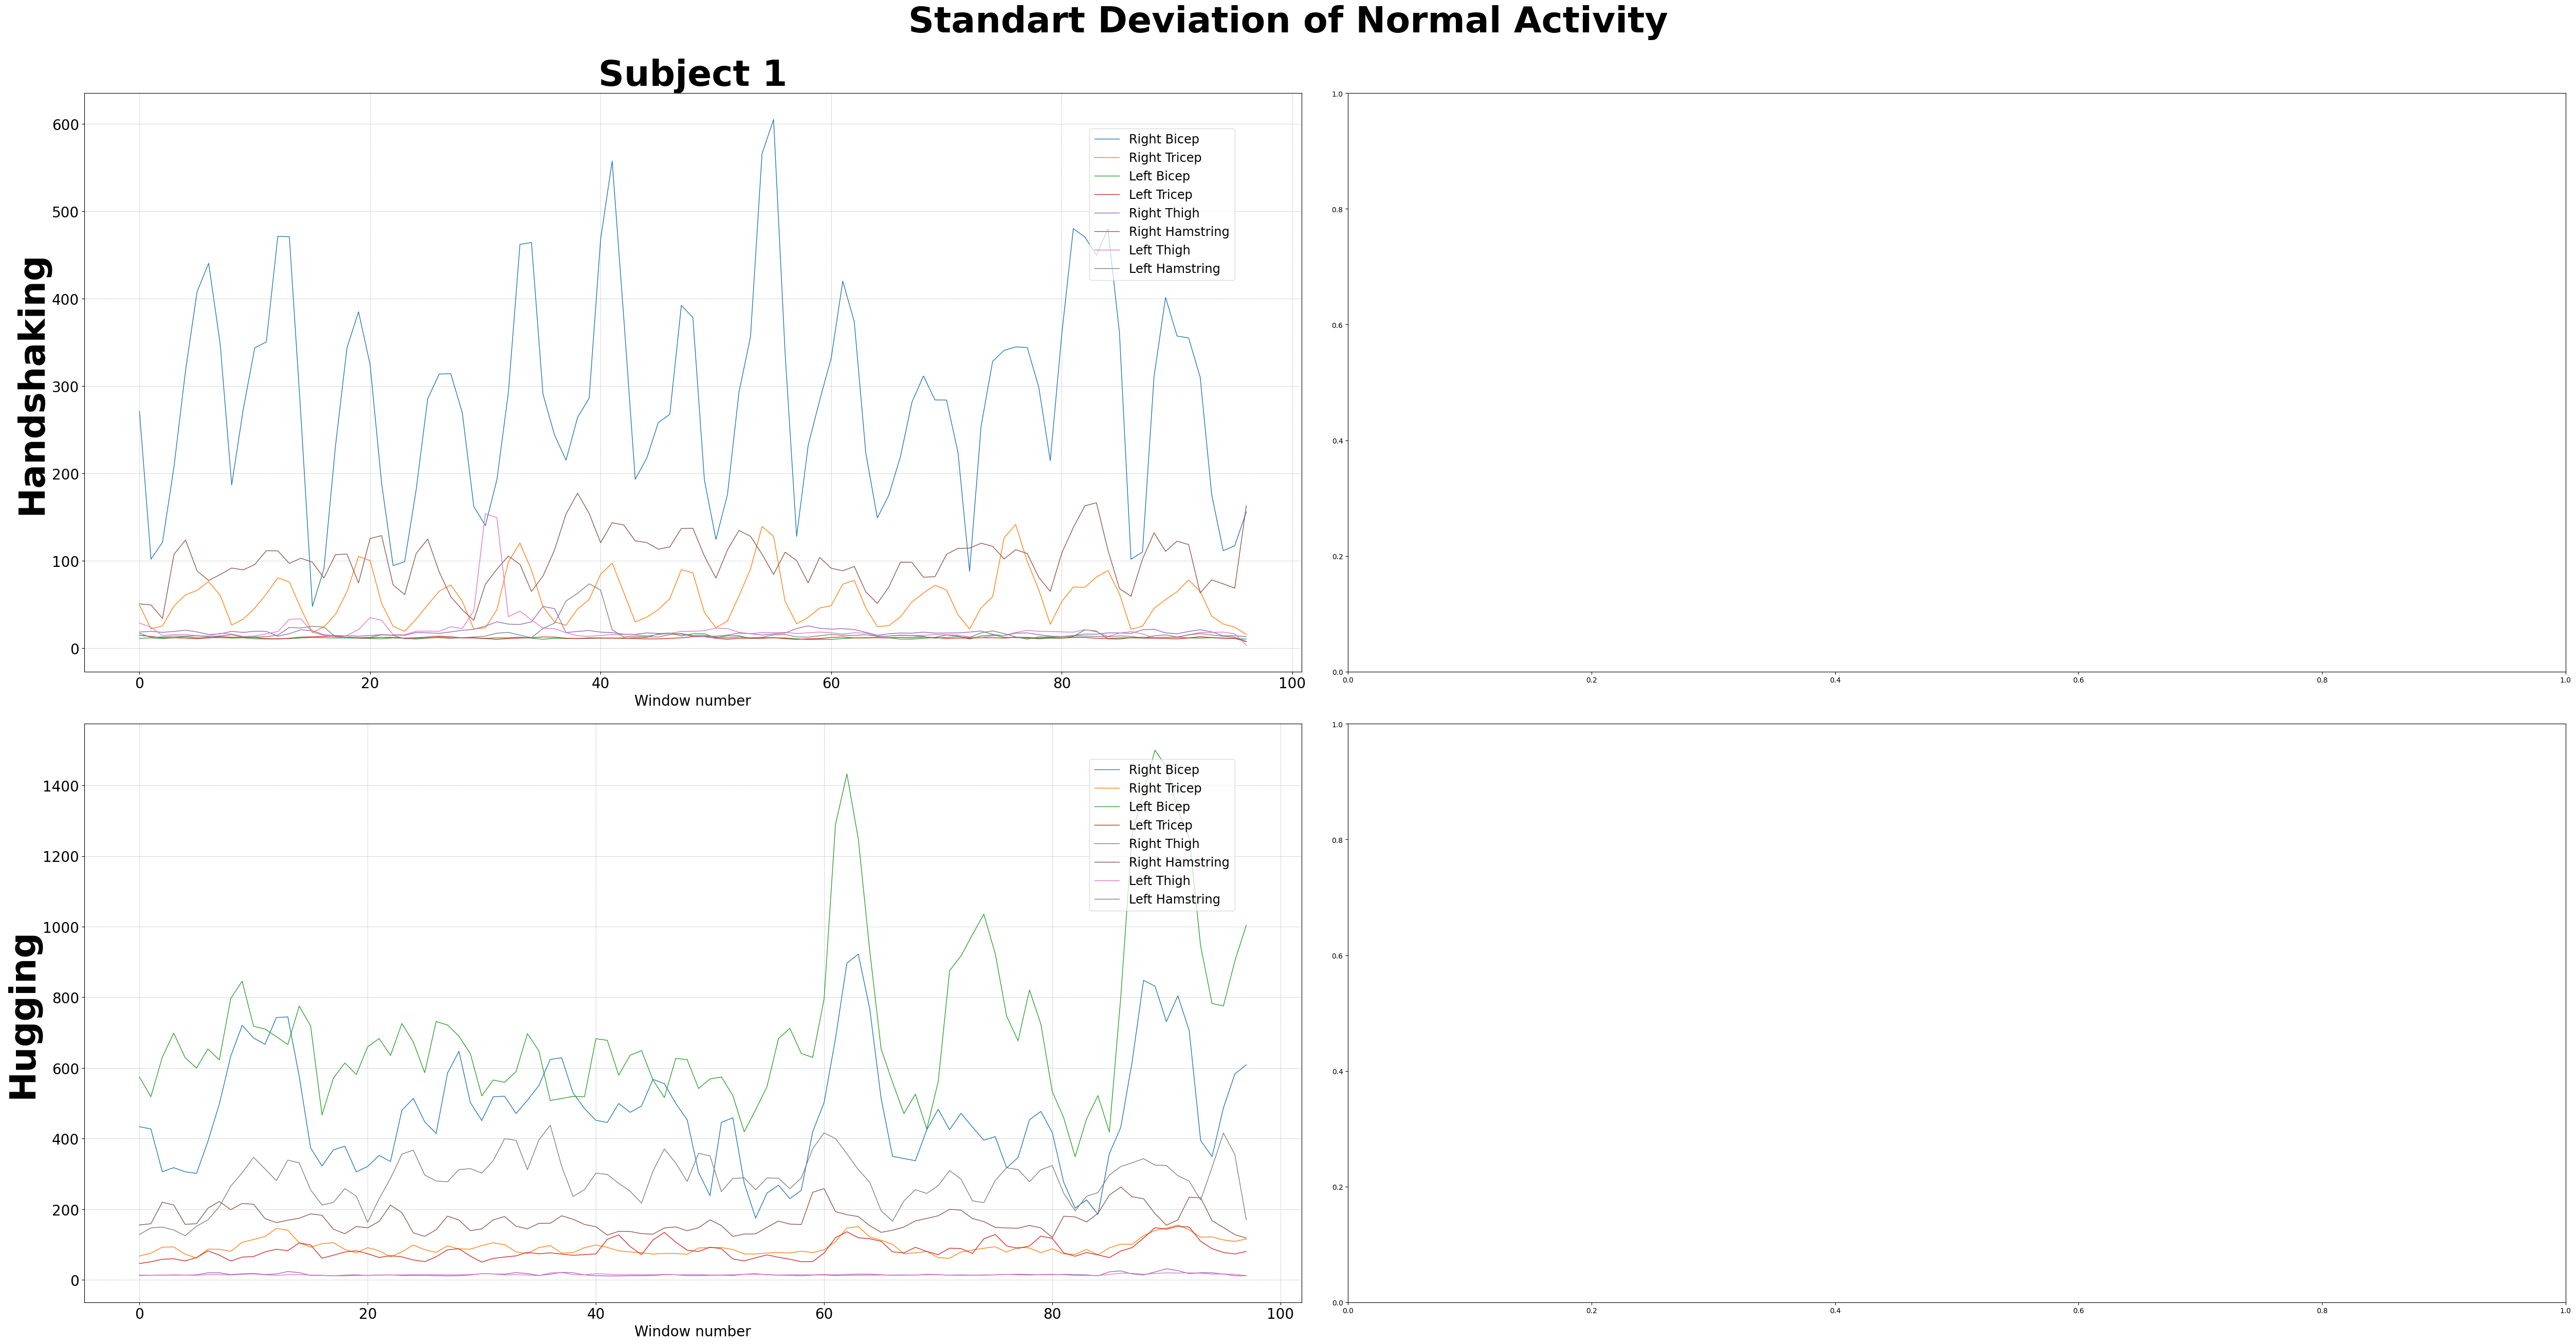

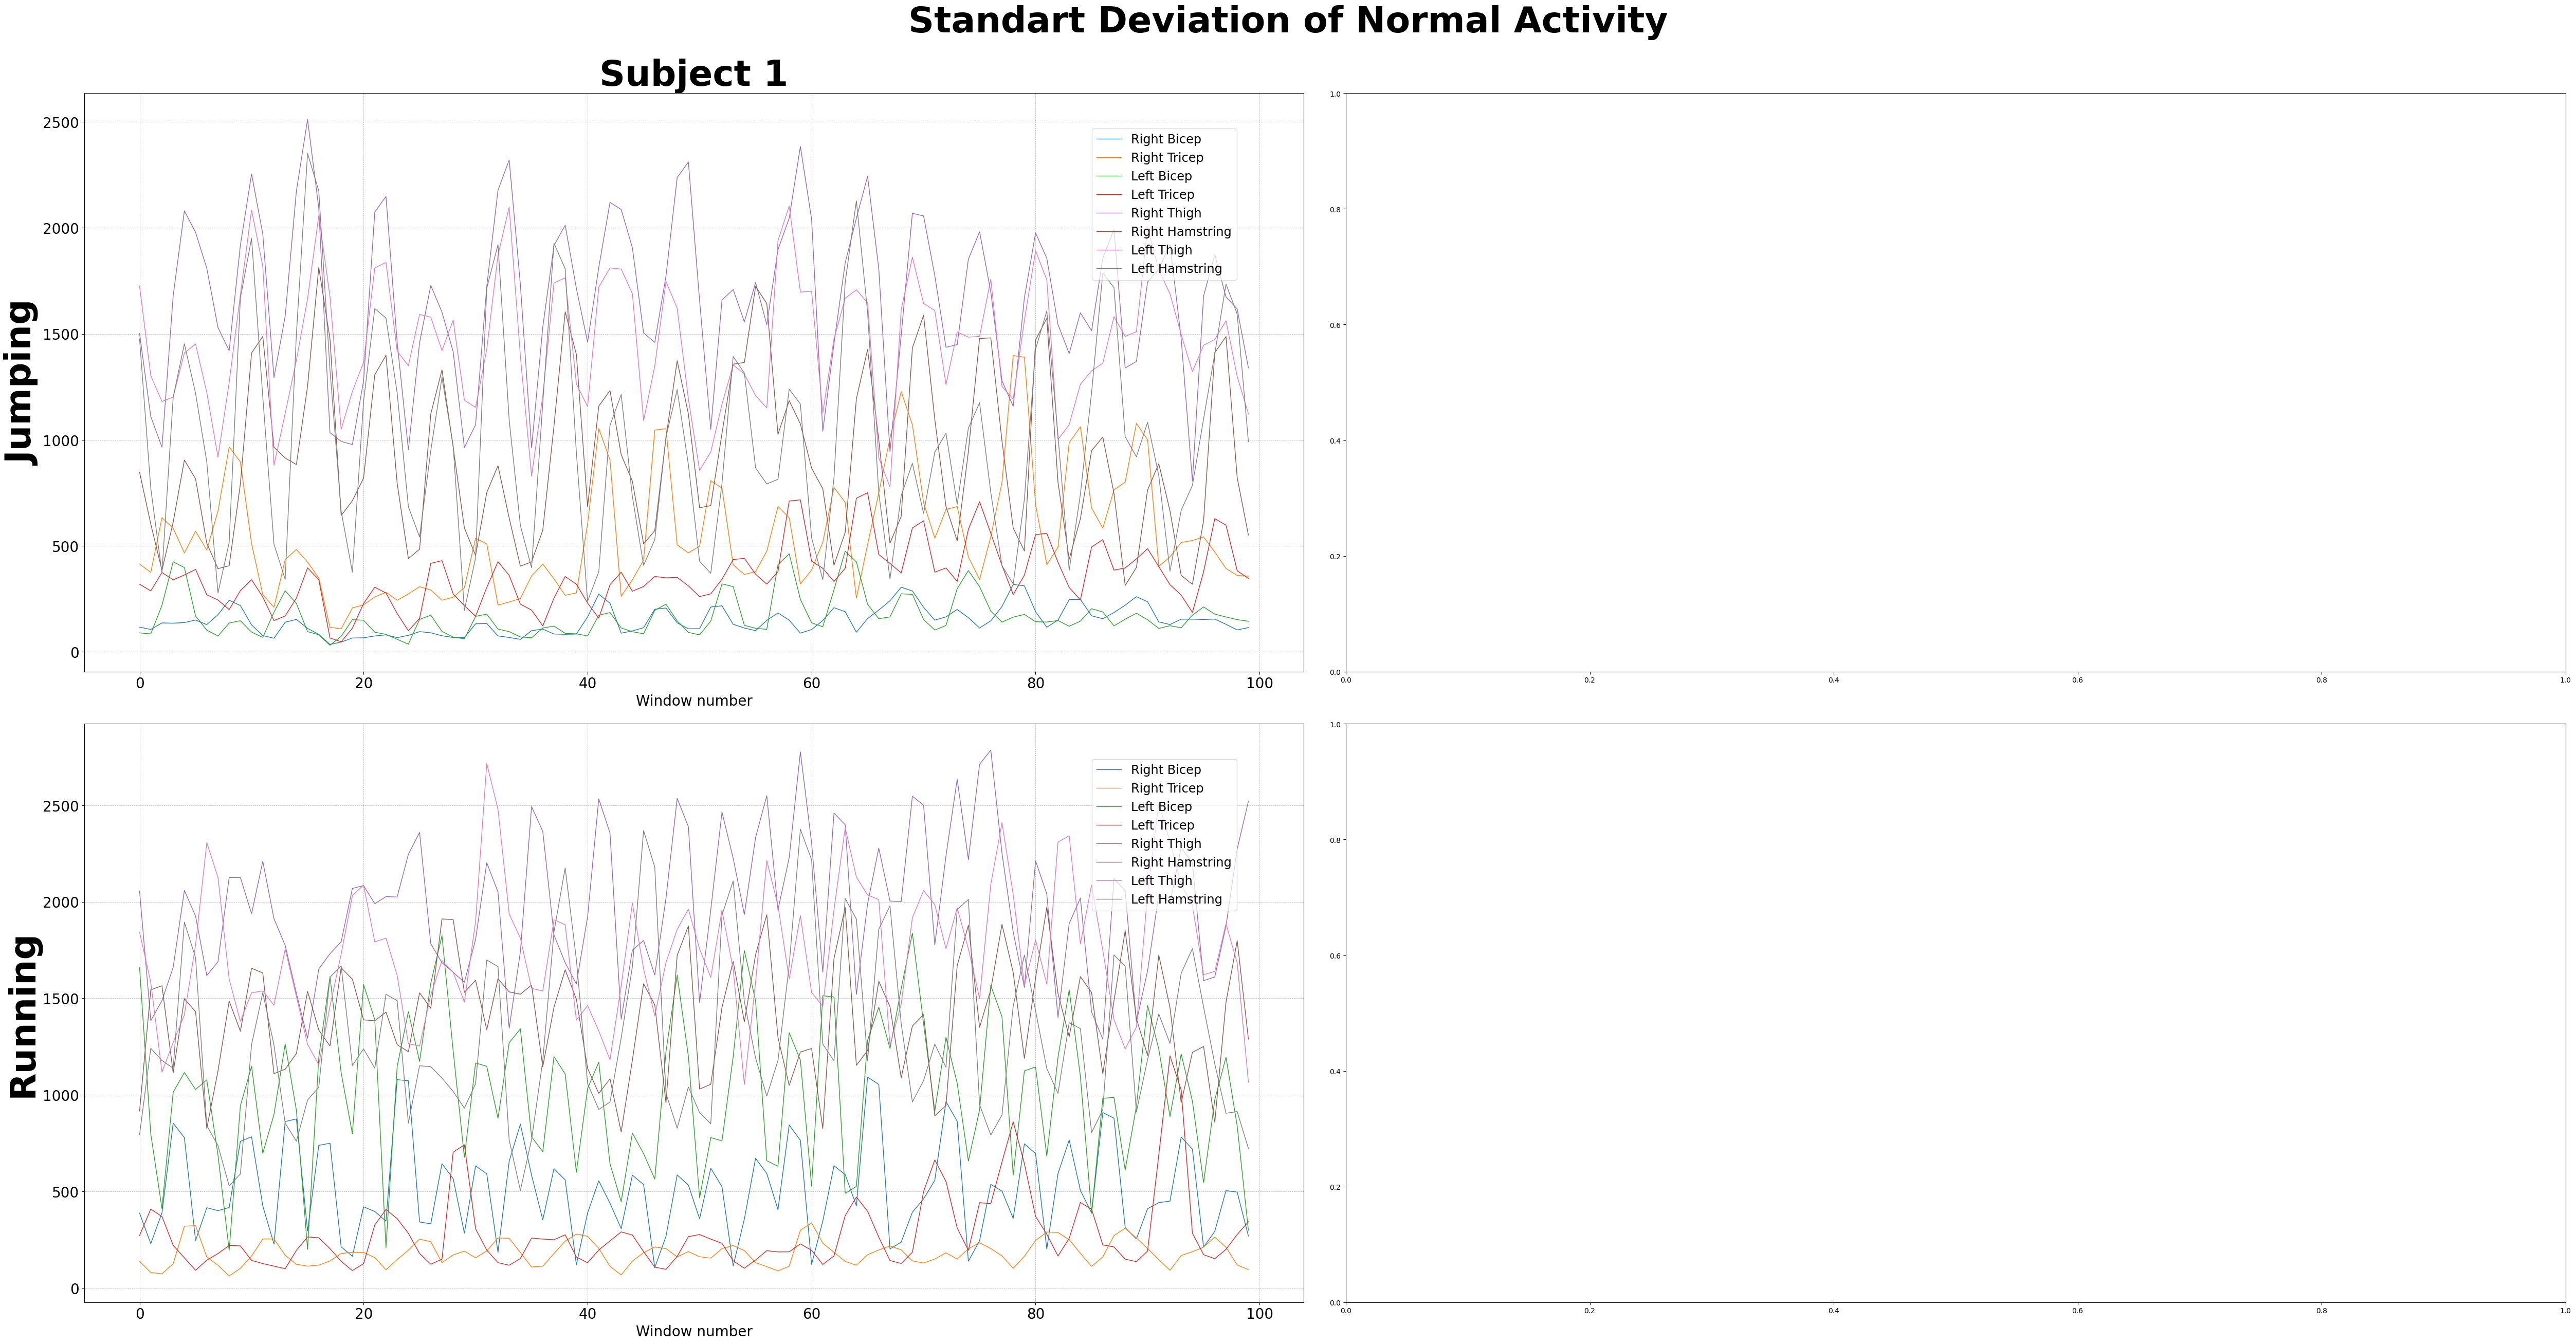

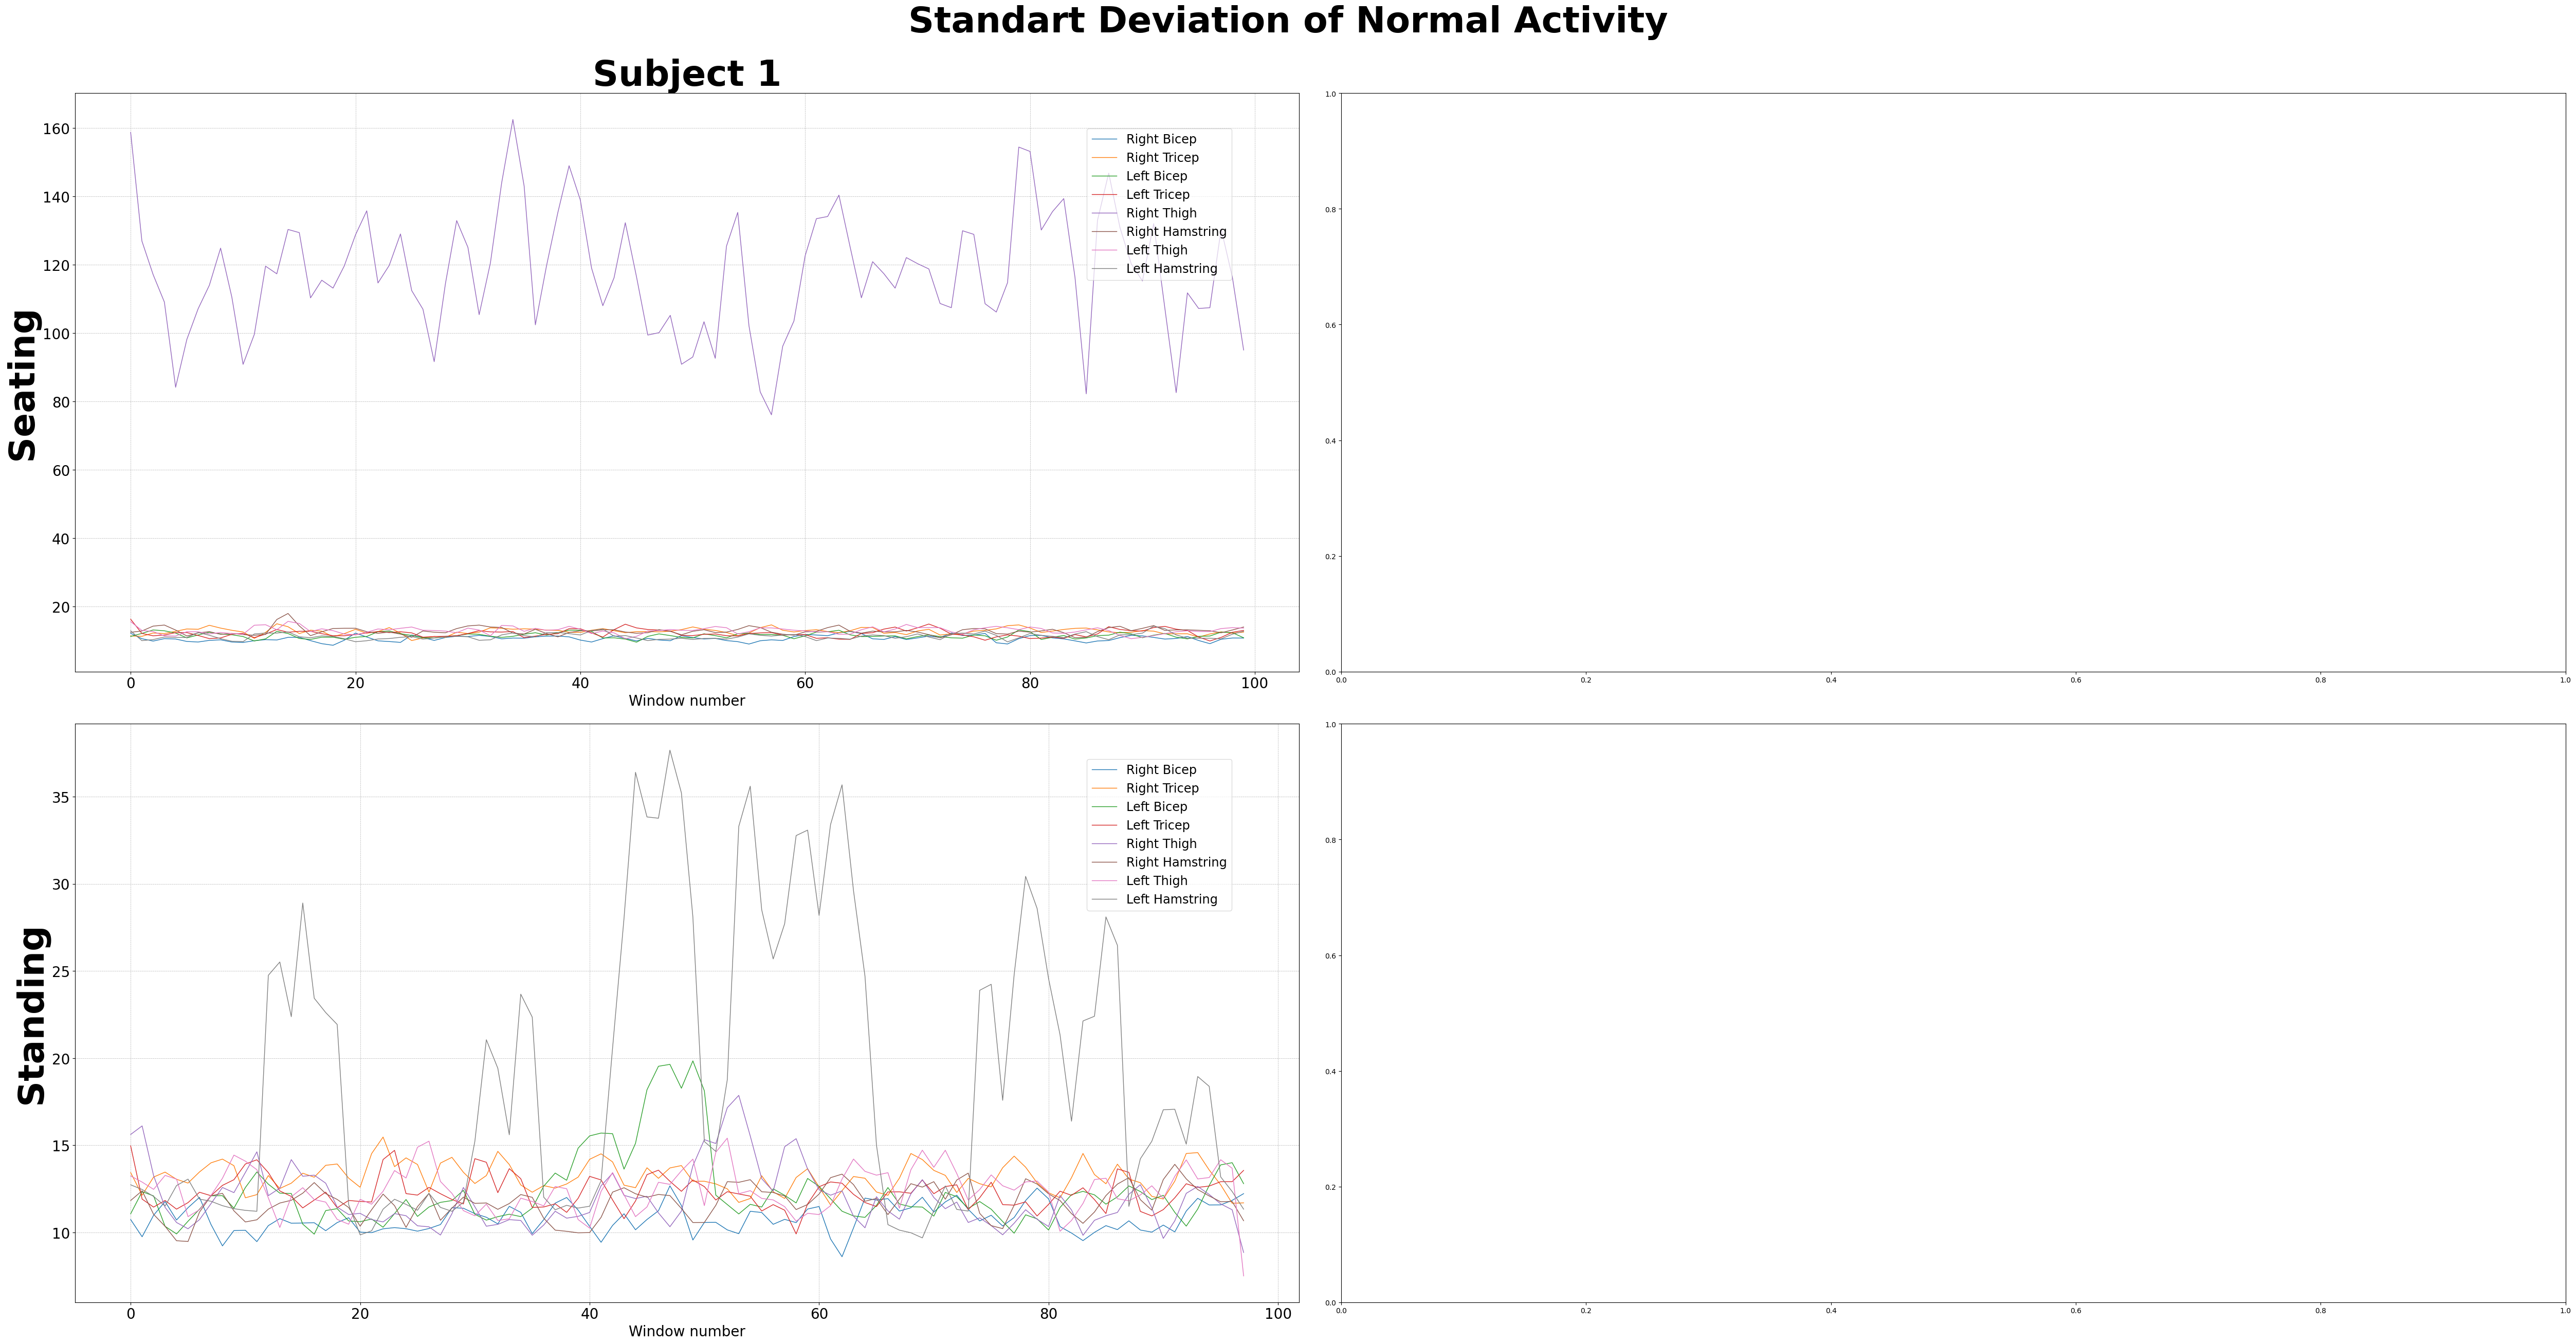

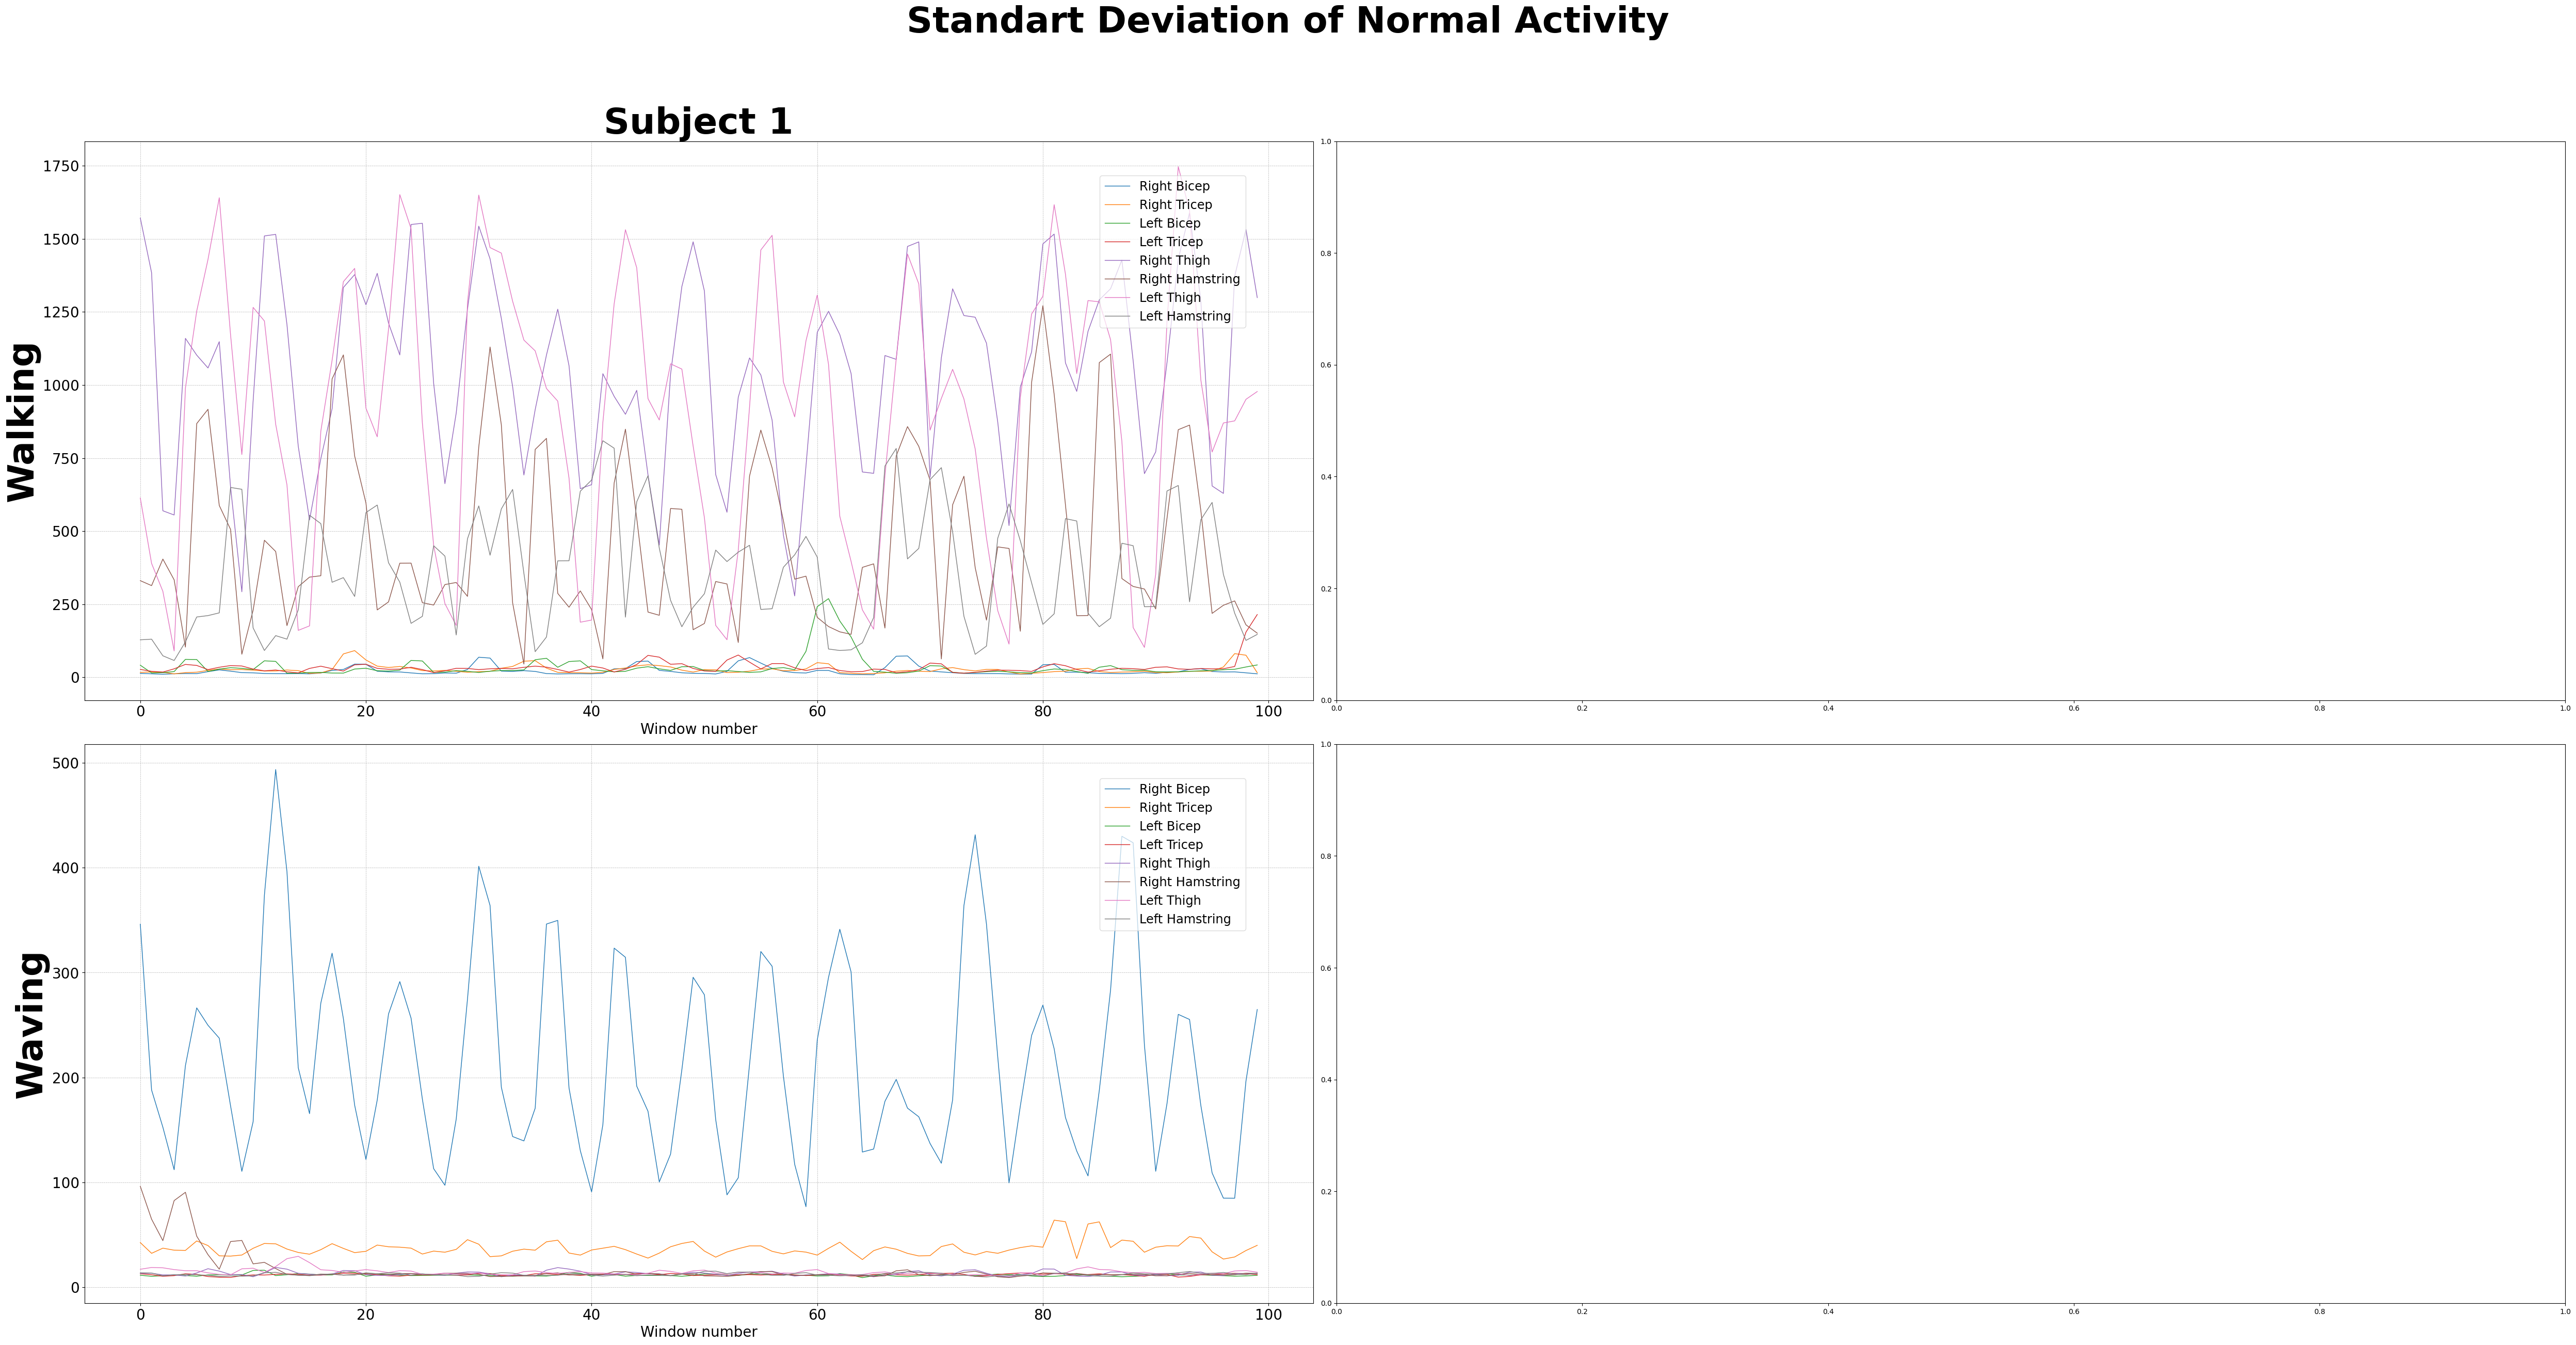

In [ ]:
window = 200

c = 0

folder_path =[]
d = []
type = ["Normal", "Aggressive"]
mode = 0
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))

for move in d:
    means = np.zeros(shape=(8, 4))
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 4, figsize=(50,50/2), constrained_layout=True)
        c = 0
    # subject loop inside the move loop
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                tmp_mav.append(np.std((y[k:k+window])))
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
            # Plot improvements
            axes_PSD[c, i - 1].plot(tmp_mav, linewidth=1, label=j)
            axes_PSD[c, i - 1].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c, i - 1].set_xlabel("Window number", fontsize=20)
            axes_PSD[c, i - 1].set_ylabel("Mean Absolut Value", fontsize=20)
            axes_PSD[c, i - 1].tick_params(axis="both", labelsize=20)

            # Titles & Legends
            if c == 0:
                axes_PSD[c, i - 1].set_title(f"Subject {i}", fontsize=50, fontweight="bold")
            if i == 1:
                axes_PSD[c, i - 1].set_ylabel(move.rsplit(".txt")[0], fontsize=50, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c, i - 1].legend(fontsize="xx-large", frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))
    c += 1
    # Bigger title for the full figure
    fig_PSD.suptitle(f"Standart Deviation of {type[mode]} Activity",fontsize=50, fontweight="bold", y=1.04)
    # Improve layout for better spacing
plt.tight_layout(pad=1)
plt.show()


Feature Values print

In [ ]:
window = 200


c = 0

for move in d:
    means = np.zeros(shape=(8, 4))
    stds = np.zeros(shape=(8, 4))
    # subject loop inside the move loop
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                nperseg = 200
                tmp_mav.append(np.mean(np.abs(y[k:k+window])))
                tmp_std.append(np.std((y[k:k+window])))
            stds[count][i-1] = np.mean(tmp_std)
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
    print(move.rsplit(".txt")[0])
    for skib in range(8):
        print(round(np.mean(stds, axis=1)[skib], 8))



PSD With Diffrent Windows

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, iirnotch, lfilter

Peak = np.zeros(shape=(1, 8))
Power = np.zeros(shape=(1, 8))
MAV = np.zeros(shape=(1, 8))
signal_mean = np.zeros(shape=(1, 8))

type = ["Normal", "Aggressive"]
mode = 1

c = 0
if type[mode] == "Normal":
    move = "Bowing.txt"
elif type[mode] == "Aggressive":
    move = "Elbowing.txt"

fig_PSD, axes_PSD = plt.subplots(4, 3, figsize=(50,50*4/3), constrained_layout=True)
window = [20,200,2000]
c = 0
for c in range(3):
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_power = []
        tmp_mav = []

        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            nperseg = window[c]
            f_PSD, Pxx_PSD = welch(y, fs=Fs, nperseg=nperseg, noverlap=0.5 * nperseg)

            tmp.append(f_PSD[np.argmax(Pxx_PSD)])  
            tmp_power.append(np.sum(Pxx_PSD) * (f_PSD[1] - f_PSD[0]))  
            tmp_mav.append(np.nanmean(np.abs(y)))  
            start = np.where(f_PSD <= 30)[0][-1]
            end = np.where(f_PSD >= 300)[0][0]
            # Plot improvements
            axes_PSD[i-1, c].plot(f_PSD[start:end], Pxx_PSD[start:end], linewidth=1, label=j)
            axes_PSD[i-1, c].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[i-1, c].set_yscale("log")
            axes_PSD[i-1, c].set_xlabel("Frequency [Hz]", fontsize=12)
            axes_PSD[i-1, c].set_ylabel("Magnitude [dB/Hz]", fontsize=12)
            axes_PSD[i-1, c].tick_params(axis="both", labelsize=10)

        # Titles & Legends
        
        if i == 1:
            axes_PSD[i-1, c].set_title(f"Window = {window[c]}", fontsize=30, fontweight="bold")
        if c == 0:
            axes_PSD[i-1, c].set_ylabel(f"Subject {i}", fontsize=30, fontweight="bold")

        # **Make legend smaller and position it better**
        axes_PSD[i-1, c].legend(fontsize="xx-large", frameon=True, framealpha=0.7, 
                                loc="upper right", bbox_to_anchor=(0.95, 0.95))


    Peak = np.vstack((Peak, tmp))
    Power = np.vstack((Power, tmp_power))
    MAV = np.vstack((MAV, tmp_mav))
# Bigger title for the full figure

# Improve layout for better spacing
fig_PSD.suptitle(f"Power Spectral Density (PSD) of {move.rsplit('.')[0]} wiith Window size = {window} [ms]",fontsize=50, fontweight="bold", y=1.03)
plt.tight_layout(pad=1)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, butter, iirnotch, lfilter

Peak = np.zeros(shape=(1, 8))
Power = np.zeros(shape=(1, 8))
MAV = np.zeros(shape=(1, 8))
signal_mean = np.zeros(shape=(1, 8))

c = 0

for move in d:
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 4, figsize=(25,12.5), constrained_layout=True)
        c = 0
    for i in range(1, 5):
        file = move
        folder_path = fr"data\sub{i}\Aggressive\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_power = []
        tmp_mav = []

        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            nperseg = 200
            f_PSD, Pxx_PSD = welch(y, fs=Fs, nperseg=nperseg, noverlap=0.5 * nperseg)

            tmp.append(f_PSD[np.argmax(Pxx_PSD)])  
            tmp_power.append(np.sum(Pxx_PSD) * (f_PSD[1] - f_PSD[0]))  
            tmp_mav.append(np.nanmean(np.abs(y)))  

            # Plot improvements
            axes_PSD[c, i - 1].plot(f_PSD, Pxx_PSD, linewidth=1, label=j)
            axes_PSD[c, i - 1].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c, i - 1].set_yscale("log")
            axes_PSD[c, i - 1].set_xlabel("Frequency [Hz]", fontsize=12)
            axes_PSD[c, i - 1].set_ylabel("Magnitude [dB/Hz]", fontsize=12)
            axes_PSD[c, i - 1].tick_params(axis="both", labelsize=10)

            # Titles & Legends
            if c == 0:
                axes_PSD[c, i - 1].set_title(f"Subject {i}", fontsize=14, fontweight="bold")
            if i == 1:
                axes_PSD[c, i - 1].set_ylabel(move.rsplit(".txt")[0], fontsize=12, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c, i - 1].legend(fontsize="x-small", frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))


        Peak = np.vstack((Peak, tmp))
        Power = np.vstack((Power, tmp_power))
        MAV = np.vstack((MAV, tmp_mav))
    c += 1
    # Bigger title for the full figure

    # Improve layout for better spacing
fig_PSD.suptitle(f"Power Spectral Density (PSD) of Aggressive {file}",fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout(pad=1)
plt.show()


Auto - Corolations

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import welch, butter, iirnotch, lfilter

folder_path =[]
d = []
name = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep","Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
type = ["Normal", "Aggressive"]
mode = 1
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))
# for 1 more tnua change d[0] to d[1]
df = pd.read_csv(folder_path + "\\" + d[0], sep="\t", header=None, names=name)

for move in name:
    Fs = 1000  
    T = 1 / Fs  
    L = len(df)
    t = np.arange(0, len(df)) * T

    # Notch and Bandpass Filters
    b_notch, a_notch = iirnotch(50, 30, Fs)
    b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

    # Combine Filters
    b_comb = np.convolve(b_notch, b_band)
    a_comb = np.convolve(a_notch, a_band)

    y = lfilter(b_comb, a_comb, df[move])
    autocorr = np.correlate(y, y, mode='full')
    lags = np.arange(-len(y) + 1, len(y))

    plt.figure(figsize=(10, 5))
    plt.plot(lags, autocorr)
    plt.title(f'Autocorrelation of {move} Signal')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True)
    plt.show()


Cross-Corolation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import welch, butter, iirnotch, lfilter

folder_path =[]
d = []
name = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep","Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
arms = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep"]
legs = ["Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
type = ["Normal", "Aggressive"]
mode = 0
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))
if mode == 1:
    move = [d[0],d[1]]
else:
    move = [d[-1],d[-2]]
for test in d:
    for c in range(2):
        arms = name[c%2*4:c%2*4+4]
        Fs = 1000  
        T = 1 / Fs  
        df = pd.read_csv(folder_path + "\\" + test, sep="\t", header=None, names=name)
        L = len(df)
        t = np.arange(0, len(df)) * T
        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)
        fig, axes = plt.subplots(2, 2, figsize=(12, 12))
        fig.suptitle(f"Cross-correlation of {type[mode]} {test.rsplit('.')[0]}")
        y_1 = lfilter(b_comb, a_comb, df[arms[0]])
        y_2 = lfilter(b_comb, a_comb, df[arms[1]])
        y_3 = lfilter(b_comb, a_comb, df[arms[2]])
        y_4 = lfilter(b_comb, a_comb, df[arms[3]])
        autocorr1 = np.correlate(y_1, y_2, mode='full')
        autocorr2 = np.correlate(y_1, y_3, mode='full')
        autocorr3 = np.correlate(y_3, y_4, mode='full')
        autocorr4 = np.correlate(y_2, y_4, mode='full')
        lags = np.arange(-len(y_1) + 1, len(y_1))
        axes[0, 0].plot(lags, autocorr1)
        axes[0, 0].set_title(f'Cross-correlation of {arms[0]} and {arms[1]} Signal')
        axes[0, 1].plot(lags, autocorr2)
        axes[0, 1].set_title(f'Cross-correlation of {arms[0]} and {arms[2]} Signal')
        axes[1, 0].plot(lags, autocorr3)
        axes[1, 0].set_title(f'Cross-correlation of {arms[2]} and {arms[3]} Signal')
        axes[1, 1].plot(lags, autocorr4)
        axes[1, 1].set_title(f'Cross-correlation of {arms[1]} and {arms[3]} Signal')
        for ax in axes.flat:
            ax.set_xlabel('Lag')
            ax.set_ylabel('Cross-correlation')
            ax.title.set_fontsize(10)
            ax.grid(True)
        plt.show()

Mean frequency

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import welch, butter, iirnotch, lfilter

folder_path =[]
d = []
name = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep","Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
arms = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep"]
legs = ["Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
type = ["Normal", "Aggressive"]
mode = 1

folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))
test = d[0]
for mus in name[0:2]:
    Fs = 1000  
    T = 1 / Fs  
    df = pd.read_csv(folder_path + "\\" + test, sep="\t", header=None, names=name)
    L = len(df)
    t = np.arange(0, len(df)) * T
    # Notch and Bandpass Filters
    b_notch, a_notch = iirnotch(50, 30, Fs)
    b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

    # Combine Filters
    b_comb = np.convolve(b_notch, b_band)
    a_comb = np.convolve(a_notch, a_band)

    y = lfilter(b_comb, a_comb, df[mus])
    nperseg = 200
    f_PSD, Pxx_PSD = welch(y, fs=Fs, nperseg=nperseg, noverlap=0.5 * nperseg)

    # Calculate cumulative sum of the PSD
    cumulative_sum = np.cumsum(Pxx_PSD)
    total_sum = cumulative_sum[-1]

    # Find the frequency where the cumulative sum is half of the total sum
    half_power_index = np.abs(cumulative_sum - total_sum / 2).argmin()
    f_at_half_power = f_PSD[half_power_index]
    area_left = cumulative_sum[half_power_index]
    area_right = total_sum - area_left
    print(f"Area to the left of the half-power frequency: {area_left}")
    print(f"Area to the right of the half-power frequency: {area_right}")
    print(f"The frequency at which the area under Pxx_PSD is half of the total is approximately: {f_at_half_power} Hz")

    plt.figure(figsize=(10, 6))
    plt.plot(f_PSD, Pxx_PSD, label="PSD")
    plt.axvline(f_at_half_power, color='g', linestyle='--', label=f"Frequency at Mean PSD: {f_at_half_power:.2f} Hz")
    plt.title(fr"Power Spectral Density (PSD) with normal Scale of {mus} while {test.rsplit('.')[0]}")
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Magnitude [Mag/Hz]")
    plt.legend()
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    plt.show()


appendix

In [ ]:
window = 200

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.signal import welch, butter, iirnotch, lfilter

folder_path =[]
d = []
name = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep","Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
arms = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep"]
legs = ["Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
type = ["Normal", "Aggressive"]
mode = 1
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))

c = 0

for move in d:
    means = np.zeros(shape=(8, 4))
    stds = np.zeros(shape=(8, 4))
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 1, figsize=(50,50/2), constrained_layout=True)
        c = 0
    # subject loop inside the move loop
    for i in range(1, 2):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                tmp_mav.append(np.mean(np.abs(y[k:k+window])))
                tmp_std.append(np.std((y[k:k+window])))
            stds[count][i-1] = np.mean(tmp_std)
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
            # Plot improvements
            axes_PSD[c].plot(tmp_mav, linewidth=2, label=j)
            axes_PSD[c].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c].set_xlabel("Window number", fontsize=28)
            axes_PSD[c].set_ylabel("Mean Absolut Value", fontsize=28)
            axes_PSD[c].tick_params(axis="both", labelsize=20)

            # Titles & Legends
            if c == 0:
                axes_PSD[c].set_title(f"Subject {i}", fontsize=50, fontweight="bold")
            if i == 1:
                axes_PSD[c].set_ylabel(move.rsplit(".txt")[0], fontsize=50, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c].legend(fontsize=20, frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))
    c += 1
    # Bigger title for the full figure
    fig_PSD.suptitle(f"Mean Absolute Value of {type[mode]} Activity",fontsize=50, fontweight="bold", y=1.04)
    # Improve layout for better spacing
plt.tight_layout(pad=1)
plt.show()


In [ ]:
window = 200

c = 0

folder_path =[]
d = []
name = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep","Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
arms = ["Right Bicep","Right Tricep","Left Bicep","Left Tricep"]
legs = ["Right Thigh","Right Hamstring","Left Thigh","Left Hamstring"]
type = ["Normal", "Aggressive"]
mode = 1
folder_path = fr"data\sub{1}\{type[mode]}\txt"
d = (os.listdir(folder_path))

for move in d:
    means = np.zeros(shape=(8, 4))
    if c%2 == 0:
        fig_PSD, axes_PSD = plt.subplots(2, 1, figsize=(50,50/2), constrained_layout=True)
        c = 0
    # subject loop inside the move loop
    for i in range(1, 2):
        file = move
        folder_path = fr"data\sub{i}\{type[mode]}\txt"
        df = pd.read_csv(folder_path + "\\" + file, sep="\t", header=None, names=name)

        Fs = 1000  
        T = 1 / Fs  
        L = len(df)
        t = np.arange(0, len(df)) * T

        # Notch and Bandpass Filters
        b_notch, a_notch = iirnotch(50, 30, Fs)
        b_band, a_band = butter(4, [30 / (Fs / 2), 300 / (Fs / 2)], 'band')

        # Combine Filters
        b_comb = np.convolve(b_notch, b_band)
        a_comb = np.convolve(a_notch, a_band)

        tmp = []
        tmp_mav = []
        tmp_std = []
        count = 0 
        # muscle loop inside the subject loop
        for j in name:
            y = lfilter(b_comb, a_comb, df[j])
            tmp_mav = []
            for k in range(0, len(y), window//2):
                tmp_mav.append(np.std((y[k:k+window])))
            means[count][i-1] = np.mean(tmp_mav)
            count += 1
            # Plot improvements
            axes_PSD[c].plot(tmp_mav, linewidth=1, label=j)
            axes_PSD[c].grid(True, which="both", linestyle="--", linewidth=0.5)
            axes_PSD[c].set_xlabel("Window number", fontsize=20)
            axes_PSD[c].set_ylabel("Mean Absolut Value", fontsize=20)
            axes_PSD[c].tick_params(axis="both", labelsize=20)

            # Titles & Legends
            if c == 0:
                axes_PSD[c].set_title(f"Subject {i}", fontsize=50, fontweight="bold")
            if i == 1:
                axes_PSD[c].set_ylabel(move.rsplit(".txt")[0], fontsize=50, fontweight="bold")

            # **Make legend smaller and position it better**
            axes_PSD[c].legend(fontsize="xx-large", frameon=True, framealpha=0.7, 
                                    loc="upper right", bbox_to_anchor=(0.95, 0.95))
    c += 1
    # Bigger title for the full figure
    fig_PSD.suptitle(f"Standart Deviation of {type[mode]} Activity",fontsize=50, fontweight="bold", y=1.04)
    # Improve layout for better spacing
plt.tight_layout(pad=1)
plt.show()